Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [1]:
import pandas as pd                       # Importing the Necessary Libraries.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the Dataset.
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# To Check the Dataset shape
data.shape

(891, 12)

In [5]:
# To Check the Info about the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# To check the Null Values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# observation: 
# we Have 177 Null Values in Age Column.
# we Have 687 Null Values in Cabin Column.
# we have 02 Null values in Embarked column

In [8]:
data['Age'].isnull().sum() # To Check the Null value in particular column.

177

In [9]:
data['Age'].unique() # To check the Unique values

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [10]:
# To Check Datatype
data.dtypes 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
#observations:
# Age option is in float type,Cabin and Embarked also in Object Data Type.


In [12]:
from sklearn.experimental import enable_iterative_imputer

In [13]:
from sklearn.impute import IterativeImputer


In [14]:
Iterative_imp=IterativeImputer()
Iterative_imp=pd.DataFrame(Iterative_imp.fit_transform(data[['Survived','Age']]),columns=['Survived','Age'])

In [15]:
Iterative_imp['Age'] #these are the imputated Age columns

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    30.409414
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [16]:
data['Age']=Iterative_imp['Age'] # Assigning the Same to Original Dataset

In [17]:
data['Age'].isnull().sum() # Rechecking the Null values,replaced all the values.

0

In [18]:
data['Cabin'].isnull().sum() # Checking the Null Values in Cabin column

687

In [19]:
data['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [20]:
# Almost 70% of the data in column is Cabin is not available,so we are dropping the same fromthe Dataset.

In [21]:
data.drop('Cabin',axis=1,inplace=True)      #Dropped Cabin Column from Dataset.

In [22]:
data['Embarked'].isnull().sum()  # 02 Null in Embarked Column

2

In [23]:
data['Embarked'].unique()  # we can Nan values in unique function also

array(['S', 'C', 'Q', nan], dtype=object)

In [24]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [25]:
data['Embarked'].isnull().sum()

0

In [26]:
# Rechecking the Null values in dataset.
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [27]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.409414,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [28]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [29]:
# splitting the Categorical Columns and Continous Columns.
data_cat=data[['PassengerId','Survived','Pclass','Name','Sex','SibSp','Parch','Ticket','Embarked']].copy()

In [30]:
data_con=data[['Age','Fare']].copy()

In [31]:
data_cat

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,C


In [32]:
data_con

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,30.409414,23.4500
889,26.000000,30.0000


                              EDA

In [33]:
# To See Categorical Columns Visualization
data_cat.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Embarked'],
      dtype='object')

0    549
1    342
Name: Survived, dtype: int64


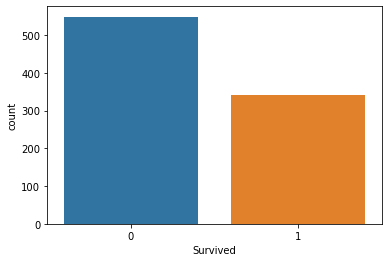

In [34]:
print(data['Survived'].value_counts())
sns.countplot(x=data['Survived'])  # 0 means No Survival=549 Pax,1 Means Survived=342.
plt.show()                         # Visualization of Target Variable="Survived"

3    491
1    216
2    184
Name: Pclass, dtype: int64


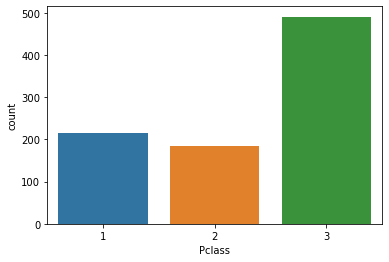

In [36]:
print(data['Pclass'].value_counts()) # 03 classes are there,class -1 had 216 passengers,class-2 had 184 passengers,class-3 had 491 passengers. 
sns.countplot(x=data['Pclass'])
plt.show()

male      577
female    314
Name: Sex, dtype: int64


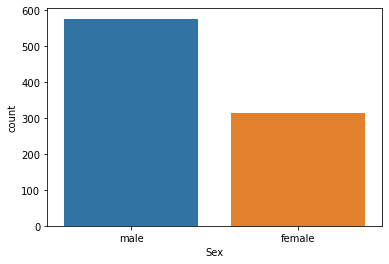

In [35]:
print(data['Sex'].value_counts())
sns.countplot(x=data['Sex'])    # we Have 577 as male and 314 as female count.
plt.show()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


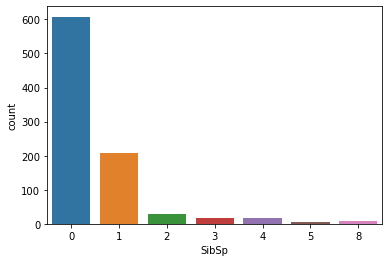

In [36]:
print(data['SibSp'].value_counts()) # we can see SibSp counts.
sns.countplot(x=data['SibSp'])
plt.show()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


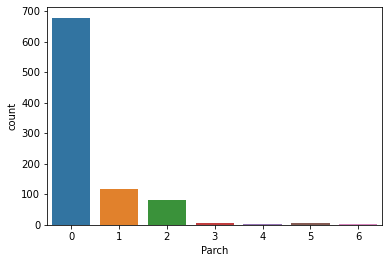

In [37]:
print(data['Parch'].value_counts())
sns.countplot(x=data['Parch'])
plt.show()  # Parch counts  0=678,1=118,2=80,3=5,4=4,5=5,6=1

S    646
C    168
Q     77
Name: Embarked, dtype: int64


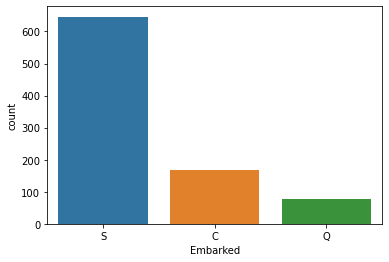

In [38]:
print(data['Embarked'].value_counts())
sns.countplot(x=data['Embarked'])
plt.show() # we have S class-646 pax,c class-168 pax,q class-77 Pax.

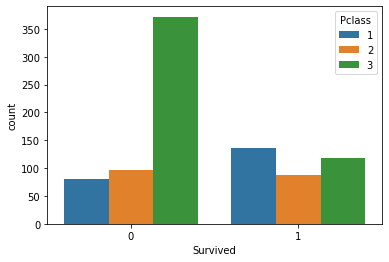

In [39]:
 # to see the survived in P class
sns.countplot(x=data['Survived'],hue='Pclass',data=data)  
plt.show()
#0 means No Survival,1 means Survived
# Class p3 has more number of Non Survival Passengers.
# Class p2 has equal Survival,Non Survival Passengers
# Class p1 has more Survived Passengers.

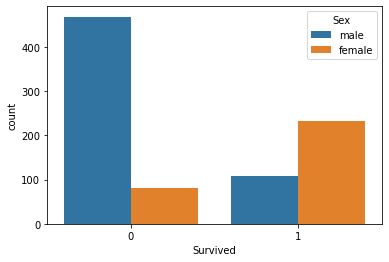

In [40]:
# To see the Survival Count Via Gender wise
sns.countplot(x=data['Survived'],hue='Sex',data=data)
plt.show()
# we Can see more no of female Customers have survived.

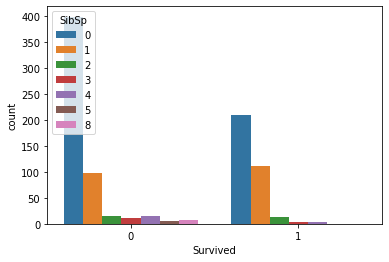

In [41]:
sns.countplot(x=data['Survived'],hue='SibSp',data=data)
plt.show() 
# SibSp Category 1 Have less survivors.
# SibSp Category 0 have More Survivors.

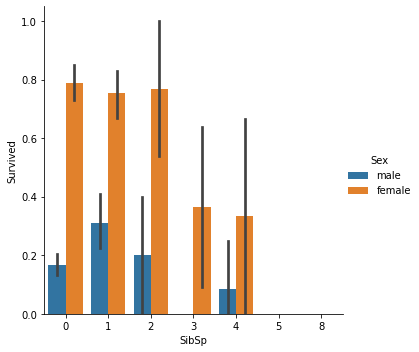

In [42]:
sns.catplot(x='SibSp',y='Survived',hue="Sex",data=data,kind='bar')
plt.show()


In [43]:
 # we will see the Data Visualization for Continous columns
data_con.columns

Index(['Age', 'Fare'], dtype='object')

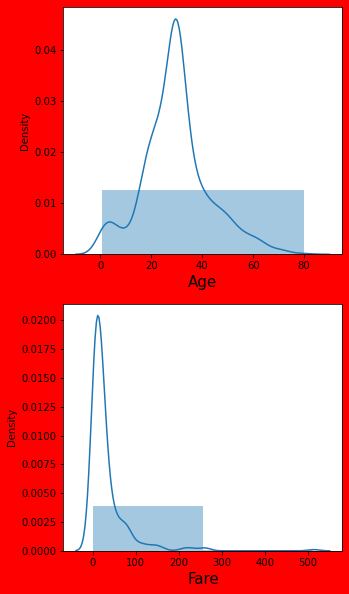

In [44]:
plt.figure(figsize=(5,10),facecolor='red')
plotnumber=1

for column in data_con:
    if plotnumber<=2:
        ax=plt.subplot(2,1,plotnumber)
        sns.distplot(data_con[column],plotnumber)
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()
    

In [45]:
# observations: we have some skewness in Age column as well Fare column.
 

In [46]:
features=data_con[['Age','Fare']]
target=data['Survived']
features

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,30.409414,23.4500
889,26.000000,30.0000


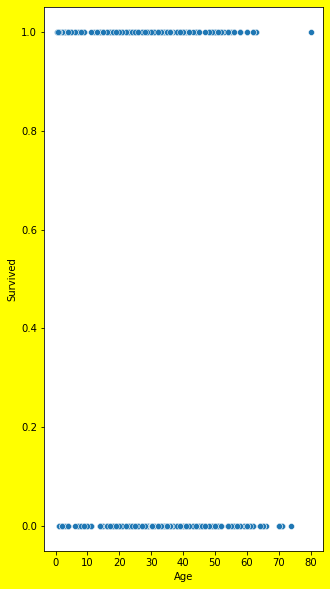

In [47]:
x=data_con.Age
y=data.Survived
plt.figure(figsize=(5,10),facecolor='yellow')
sns.scatterplot(x=x,y=y,data=data)
plt.show()
    

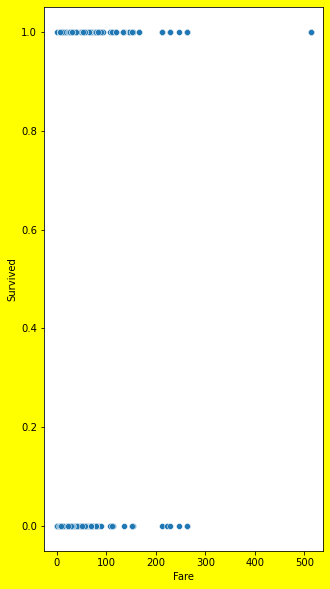

In [48]:
x=data_con.Fare
y=data.Survived
plt.figure(figsize=(5,10),facecolor='yellow')
sns.scatterplot(x=x,y=y,data=data)
plt.show()

In [49]:
# Observations:
# we can equal Distribution of the values from(0to 75 )in Age Column.
# we can equal Distribution of the values from(0to 250)in Fare column.

                                           Skewness 

In [50]:
data_con.skew() # we observed Skewness.

Age     0.424947
Fare    4.787317
dtype: float64

In [51]:
# we will see skewness transformation shortly.

                                   ENCODING 

In [52]:
from sklearn.preprocessing import OrdinalEncoder

In [53]:
oe=OrdinalEncoder()


In [54]:
data_enc=data[['PassengerId','Name','Ticket','Embarked']].copy()

In [55]:
data_enc.dtypes

PassengerId     int64
Name           object
Ticket         object
Embarked       object
dtype: object

In [56]:
for i in data_enc.columns:
    data_enc[i]=oe.fit_transform(data_enc[i].values.reshape(-1,1))
    data_enc
        

In [57]:
data_enc

,PassengerId,Name,Ticket,Embarked
0,0.0,108.0,523.0,2.0
1,1.0,190.0,596.0,0.0
2,2.0,353.0,669.0,2.0
3,3.0,272.0,49.0,2.0
4,4.0,15.0,472.0,2.0
...,...,...,...,...
886,886.0,548.0,101.0,2.0
887,887.0,303.0,14.0,2.0
888,888.0,413.0,675.0,2.0
889,889.0,81.0,8.0,0.0


In [58]:
data['PassengerId']=data_enc['PassengerId']
data['Name']=data_enc['Name']                        # Encoded data is assigned to old dataset.
data['Ticket']=data_enc['Ticket']
data['Embarked']=data_enc['Embarked']


In [59]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,0,3,108.0,male,22.000000,1,0,523.0,7.2500,2.0
1,1.0,1,1,190.0,female,38.000000,1,0,596.0,71.2833,0.0
2,2.0,1,3,353.0,female,26.000000,0,0,669.0,7.9250,2.0
3,3.0,1,1,272.0,female,35.000000,1,0,49.0,53.1000,2.0
4,4.0,0,3,15.0,male,35.000000,0,0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...,...
886,886.0,0,2,548.0,male,27.000000,0,0,101.0,13.0000,2.0
887,887.0,1,1,303.0,female,19.000000,0,0,14.0,30.0000,2.0
888,888.0,0,3,413.0,female,30.409414,1,2,675.0,23.4500,2.0
889,889.0,1,1,81.0,male,26.000000,0,0,8.0,30.0000,0.0


In [60]:
from sklearn.preprocessing import LabelEncoder              # Encoded Sex column with Label Encoder.

In [61]:
le=LabelEncoder()
le_enc=le.fit_transform(data['Sex'])
le_enc

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [62]:
sex=pd.Series(le_enc)
sex

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Length: 891, dtype: int32

In [63]:
data['Sex']=sex

In [65]:
data  # all Columns are Encoded.             

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,0,3,108.0,1,22.000000,1,0,523.0,7.2500,2.0
1,1.0,1,1,190.0,0,38.000000,1,0,596.0,71.2833,0.0
2,2.0,1,3,353.0,0,26.000000,0,0,669.0,7.9250,2.0
3,3.0,1,1,272.0,0,35.000000,1,0,49.0,53.1000,2.0
4,4.0,0,3,15.0,1,35.000000,0,0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...,...
886,886.0,0,2,548.0,1,27.000000,0,0,101.0,13.0000,2.0
887,887.0,1,1,303.0,0,19.000000,0,0,14.0,30.0000,2.0
888,888.0,0,3,413.0,0,30.409414,1,2,675.0,23.4500,2.0
889,889.0,1,1,81.0,1,26.000000,0,0,8.0,30.0000,0.0


In [64]:
data.shape

(891, 11)

In [65]:
x1=data.drop(columns='Survived',axis=1)
y1=data['Survived']

In [66]:
x1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,3,108.0,1,22.000000,1,0,523.0,7.2500,2.0
1,1.0,1,190.0,0,38.000000,1,0,596.0,71.2833,0.0
2,2.0,3,353.0,0,26.000000,0,0,669.0,7.9250,2.0
3,3.0,1,272.0,0,35.000000,1,0,49.0,53.1000,2.0
4,4.0,3,15.0,1,35.000000,0,0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...
886,886.0,2,548.0,1,27.000000,0,0,101.0,13.0000,2.0
887,887.0,1,303.0,0,19.000000,0,0,14.0,30.0000,2.0
888,888.0,3,413.0,0,30.409414,1,2,675.0,23.4500,2.0
889,889.0,1,81.0,1,26.000000,0,0,8.0,30.0000,0.0


In [67]:
y1

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

                   CORRELATION

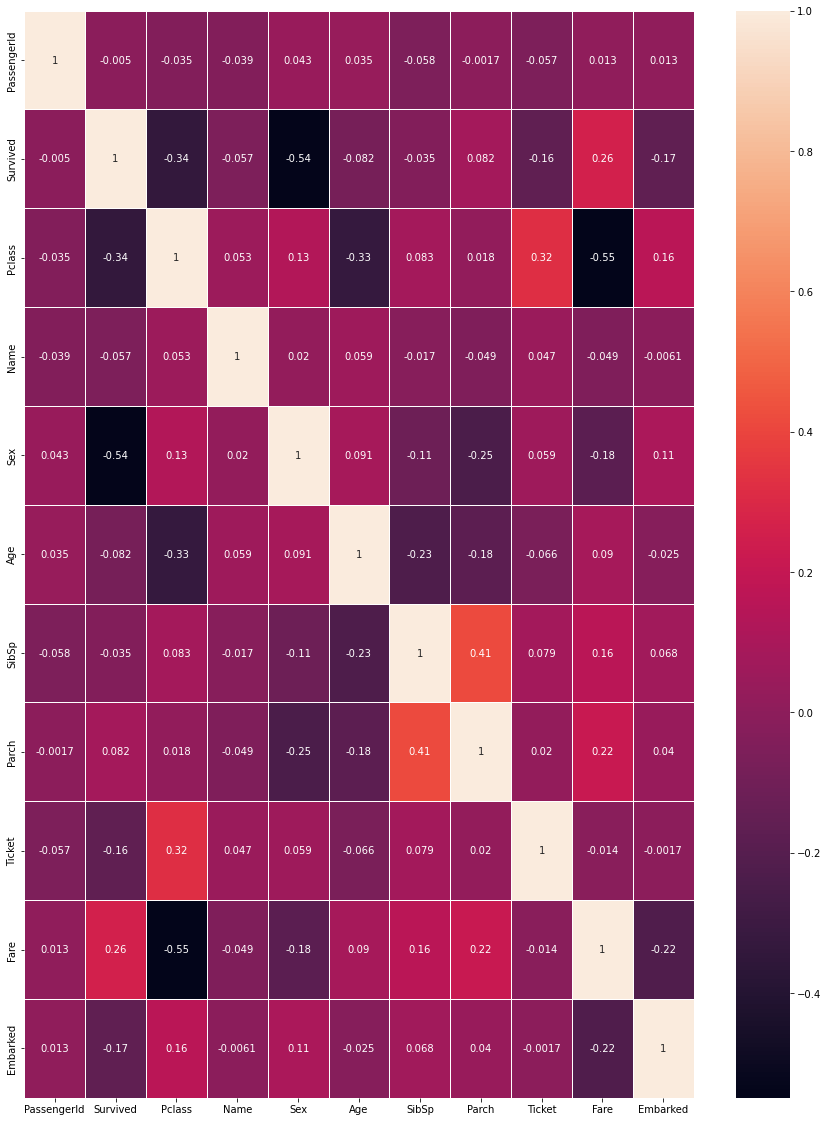

In [68]:
corr=data.corr()
plt.figure(figsize=(15,20))
sns.heatmap(data=corr,annot=True,linewidths=0.5)
plt.show()

In [69]:
corr['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Name          -0.057343
Age           -0.081738
Ticket        -0.164549
Embarked      -0.167675
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

In [70]:
#Sex Column is having strong Bond with Target Variable
# P class,fare  with medium bond 
# we can see some corelation between two features('SibSp' and'Parch'),will use Variance Influence Factor shortly to check the same.


                                   standardization                            

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaled=StandardScaler()
x_scaled=scaled.fit_transform(x1)
x_scaled.shape

(891, 10)

                                    PCA

In [73]:
from sklearn.decomposition import PCA

In [74]:
pca=PCA()
pca.fit_transform(x_scaled)


array([[-1.53182257,  0.59210929,  0.31880681, ...,  0.24197983,
        -0.2607782 , -0.0055502 ],
       [ 2.09052449,  0.20606425,  2.10843543, ..., -0.29126506,
        -0.91862167, -0.8587706 ],
       [-1.17780867,  0.62635049,  1.34942811, ...,  0.62839637,
        -0.16751398, -0.01795078],
       ...,
       [-0.33852141,  2.05045079, -0.45253621, ..., -0.48433411,
         0.54631664, -0.20906767],
       [ 1.66448907, -1.42915621, -1.54447876, ..., -0.52102959,
        -0.09709689, -0.76284831],
       [-0.90037969, -0.73715356, -0.58180571, ..., -0.49782703,
        -0.07791314,  0.15980255]])

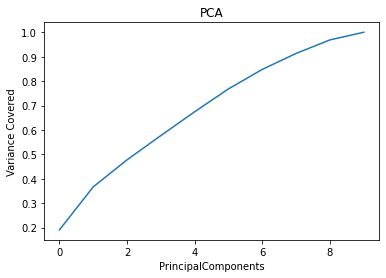

In [75]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('PrincipalComponents')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()


In [76]:
# Observation:
# By using Spreeplot,felt that we can choose components=8 to see data variance fully.


In [77]:
pca=PCA(n_components=8)
new_pca=pca.fit_transform(x_scaled)
comp=pd.DataFrame(new_pca,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8'])
comp

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,-1.531823,0.592109,0.318807,0.550237,-0.827567,-2.052230,-0.142835,0.241980
1,2.090524,0.206064,2.108435,1.351735,-0.781064,-1.274433,0.720768,-0.291265
2,-1.177809,0.626350,1.349428,0.399157,-1.160118,-0.828722,1.795986,0.628396
3,1.795948,-0.091874,-0.395357,-0.736937,-2.268950,-0.850401,0.399240,0.325992
4,-1.265786,-0.371334,0.126266,0.610986,-0.915990,-2.284096,0.452157,-0.248749
...,...,...,...,...,...,...,...,...
886,-0.197331,-1.140676,-1.576221,-0.355742,0.606719,1.105848,-0.662554,0.410008
887,1.367801,-0.486004,-2.198978,0.390845,-0.509141,1.483797,0.411908,1.124530
888,-0.338521,2.050451,-0.452536,0.149038,1.781823,0.782816,2.000850,-0.484334
889,1.664489,-1.429156,-1.544479,2.006992,0.244019,0.710880,-1.530768,-0.521030


                        Checking Outliers 

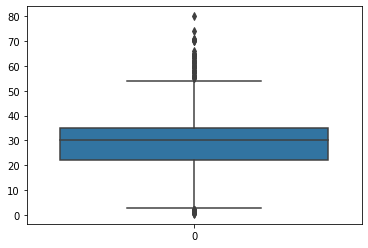

In [91]:
plt.figure()
sns.boxplot(data=x1['Age'])
plt.show()

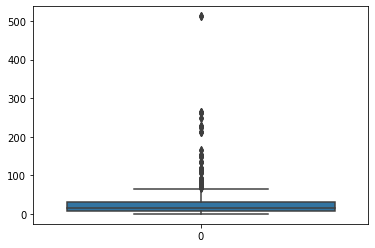

In [78]:
plt.figure()
sns.boxplot(data=x1['Fare'])
plt.show()

In [79]:
from scipy.stats import zscore

In [80]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,0,3,108.0,1,22.000000,1,0,523.0,7.2500,2.0
1,1.0,1,1,190.0,0,38.000000,1,0,596.0,71.2833,0.0
2,2.0,1,3,353.0,0,26.000000,0,0,669.0,7.9250,2.0
3,3.0,1,1,272.0,0,35.000000,1,0,49.0,53.1000,2.0
4,4.0,0,3,15.0,1,35.000000,0,0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...,...
886,886.0,0,2,548.0,1,27.000000,0,0,101.0,13.0000,2.0
887,887.0,1,1,303.0,0,19.000000,0,0,14.0,30.0000,2.0
888,888.0,0,3,413.0,0,30.409414,1,2,675.0,23.4500,2.0
889,889.0,1,1,81.0,1,26.000000,0,0,8.0,30.0000,0.0


In [81]:
x1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,3,108.0,1,22.000000,1,0,523.0,7.2500,2.0
1,1.0,1,190.0,0,38.000000,1,0,596.0,71.2833,0.0
2,2.0,3,353.0,0,26.000000,0,0,669.0,7.9250,2.0
3,3.0,1,272.0,0,35.000000,1,0,49.0,53.1000,2.0
4,4.0,3,15.0,1,35.000000,0,0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...
886,886.0,2,548.0,1,27.000000,0,0,101.0,13.0000,2.0
887,887.0,1,303.0,0,19.000000,0,0,14.0,30.0000,2.0
888,888.0,3,413.0,0,30.409414,1,2,675.0,23.4500,2.0
889,889.0,1,81.0,1,26.000000,0,0,8.0,30.0000,0.0


In [82]:
zscore=np.abs(zscore(x1))
treshold=3
np.where(zscore>3)


(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([6, 5, 6, 8, 5, 5, 5, 5, 6, 8, 4, 4, 8, 5, 5, 5, 6, 5, 5, 5, 5, 5,
        8, 5, 5, 5, 8, 8, 5, 8, 6, 8, 8, 5, 6, 6, 8, 5, 4, 8, 5, 5, 8, 6,
        6, 4, 6, 4, 6, 8, 5, 5, 8, 8, 8, 8, 6, 8, 8, 4, 6, 8, 5, 5, 5, 5,
        5, 5, 4, 6, 5, 6], dtype=int64))

In [83]:
# removing the rows from the features using zscore.


In [85]:

x1_new=x1[(zscore<3).all(axis=1)]
x1_new

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,3,108.0,1,22.000000,1,0,523.0,7.2500,2.0
1,1.0,1,190.0,0,38.000000,1,0,596.0,71.2833,0.0
2,2.0,3,353.0,0,26.000000,0,0,669.0,7.9250,2.0
3,3.0,1,272.0,0,35.000000,1,0,49.0,53.1000,2.0
4,4.0,3,15.0,1,35.000000,0,0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...
886,886.0,2,548.0,1,27.000000,0,0,101.0,13.0000,2.0
887,887.0,1,303.0,0,19.000000,0,0,14.0,30.0000,2.0
888,888.0,3,413.0,0,30.409414,1,2,675.0,23.4500,2.0
889,889.0,1,81.0,1,26.000000,0,0,8.0,30.0000,0.0


In [86]:
print("old Features:",x1.shape[0])
print("New Features:",x1_new.shape[0])
print("Difference:",x1.shape[0]-x1_new.shape[0])

old Features: 891
New Features: 820
Difference: 71


In [87]:
dataloss=(891-820)/891*100
dataloss

7.968574635241302

In [88]:
y1.value_counts()



0    549
1    342
Name: Survived, dtype: int64

In [100]:
x1_new

array([[-2.17334889,  0.87283049, -1.39782963, ...,  0.93404121,
        -0.83470177,  0.60778719],
       [-2.15454005, -1.47067587, -0.9803203 , ...,  1.21487665,
         1.55364494, -1.78767552],
       [-2.13835236,  0.87283049, -0.27824065, ...,  1.48411797,
        -0.74331399,  0.60778719],
       ...,
       [ 1.56451899,  0.87283049, -0.04483126, ...,  1.50578647,
         0.39490799,  0.60778719],
       [ 1.56754908, -1.47067587, -1.55342366, ..., -1.99052285,
         0.65432009, -1.78767552],
       [ 1.5705782 ,  0.87283049, -0.84123462, ...,  0.70528334,
        -0.76629016, -1.24967343]])

In [92]:
from sklearn.preprocessing import PowerTransformer

In [93]:
pt=PowerTransformer()

In [101]:
x1_new=(pt.fit_transform(x1_new))

In [102]:
x1_new

array([[-1.94265376,  0.89713663, -1.33986806, ...,  0.94400528,
        -0.83047889,  0.61293303],
       [-1.92845994, -1.3462461 , -0.99048993, ...,  1.29046434,
         1.51890724, -1.65705317],
       [-1.91622703,  0.89713663, -0.35894696, ...,  1.63416961,
        -0.73505319,  0.61293303],
       ...,
       [ 1.72300836,  0.89713663, -0.13176457, ...,  1.66229337,
         0.41532441,  0.61293303],
       [ 1.72688665, -1.3462461 , -1.46625846, ..., -1.79083404,
         0.66687928, -1.65705317],
       [ 1.73076486,  0.89713663, -0.87031301, ...,  0.67174789,
        -0.75901053, -1.57435143]])

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [182]:
lr=LogisticRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(comp,y1,test_size=.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The Model performs well")
        print("Random state=",i)
        print("The Training Accuracy score is :",round(accuracy_score(y_train,pred_train)*100,1))
        print("The Test Accuracy score is :",round(accuracy_score(y_test,pred_test)*100,1),'\n\n')
    


At random state 258 The Model performs well
Random state= 258
The Training Accuracy score is : 81.0
The Test Accuracy score is : 81.0 


At random state 848 The Model performs well
Random state= 848
The Training Accuracy score is : 81.0
The Test Accuracy score is : 81.0 


At random state 907 The Model performs well
Random state= 907
The Training Accuracy score is : 79.9
The Test Accuracy score is : 79.9 




In [104]:
# choosing random state=258.
x_train,x_test,y_train,y_test=train_test_split(comp,y1,test_size=0.25,random_state=258)
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [105]:
pred_test=lr.predict(x_test)
pred_test

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [106]:
accuracy_score(y_test,pred_test)

0.8251121076233184

In [107]:
from sklearn.model_selection import cross_val_score

In [108]:
for i in range(2,10):
    lss_score=cross_val_score(lr,x1,y1,cv=i)
    print(lss_score)
    lsc=lss_score.mean()
    print("At CV:",i)
    print("Cross_val_score is :",lsc*100)
    print("Accuracy_score:",accuracy_score(y_test,pred_test)*100)

[0.71524664 0.77977528]
At CV: 2
Cross_val_score is : 74.75109588350884
Accuracy_score: 82.51121076233184
[0.71380471 0.78787879 0.78787879]
At CV: 3
Cross_val_score is : 76.31874298540966
Accuracy_score: 82.51121076233184
[0.71300448 0.80269058 0.77130045 0.80630631]
At CV: 4
Cross_val_score is : 77.33254555003434
Accuracy_score: 82.51121076233184
[0.73743017 0.78651685 0.7752809  0.75842697 0.80898876]
At CV: 5
Cross_val_score is : 77.33287301487665
Accuracy_score: 82.51121076233184
[0.72483221 0.7852349  0.81208054 0.78378378 0.75       0.81081081]
At CV: 6
Cross_val_score is : 77.77903742668842
Accuracy_score: 82.51121076233184
[0.7421875  0.7890625  0.81889764 0.77165354 0.77952756 0.75590551
 0.81889764]
At CV: 7
Cross_val_score is : 78.230455568054
Accuracy_score: 82.51121076233184
[0.76785714 0.72321429 0.83035714 0.79279279 0.79279279 0.74774775
 0.79279279 0.81981982]
At CV: 8
Cross_val_score is : 78.34218146718146
Accuracy_score: 82.51121076233184
[0.73737374 0.78787879 0.76

In [109]:
# observation: Choosing Cv=6

In [110]:
def model_selection(algorithm,x_train,x_test,y_train,y_test):
    algorithm.fit(x_train,y_train)
    mod_pred_train=algorithm.predict(x_train)
    mod_pred_test=algorithm.predict(x_test)
    print("The Accuracy score of the train_data: ",accuracy_score(y_train,mod_pred_train)*100)
    print("The Accuracy score of the test _data: ",accuracy_score(y_test,mod_pred_test)*100)
    print("The Classification Report :\n\n",classification_report(y_test,mod_pred_test))
    print("The confusion Matrix:",confusion_matrix(y_test,mod_pred_test))

In [111]:
model_selection(lr,x_train,x_test,y_train,y_test)

The Accuracy score of the train_data:  80.38922155688623
The Accuracy score of the test _data:  82.51121076233184
The Classification Report :

               precision    recall  f1-score   support

           0       0.84      0.91      0.87       148
           1       0.78      0.67      0.72        75

    accuracy                           0.83       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.82      0.83      0.82       223

The confusion Matrix: [[134  14]
 [ 25  50]]


In [112]:
 # Training the Model with Decision Tree.


In [113]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
Dr=DecisionTreeClassifier()

In [115]:
model_selection(Dr,x_train,x_test,y_train,y_test)

The Accuracy score of the train_data:  100.0
The Accuracy score of the test _data:  70.4035874439462
The Classification Report :

               precision    recall  f1-score   support

           0       0.79      0.76      0.77       148
           1       0.56      0.60      0.58        75

    accuracy                           0.70       223
   macro avg       0.67      0.68      0.67       223
weighted avg       0.71      0.70      0.71       223

The confusion Matrix: [[112  36]
 [ 30  45]]


In [116]:
# Testing the Model with K_Neighbor Classifier

In [117]:
from sklearn.neighbors import KNeighborsClassifier

In [118]:
knc=KNeighborsClassifier()

In [119]:
model_selection(knc,x_train,x_test,y_train,y_test)

The Accuracy score of the train_data:  84.13173652694611
The Accuracy score of the test _data:  82.51121076233184
The Classification Report :

               precision    recall  f1-score   support

           0       0.84      0.91      0.87       148
           1       0.79      0.65      0.72        75

    accuracy                           0.83       223
   macro avg       0.81      0.78      0.79       223
weighted avg       0.82      0.83      0.82       223

The confusion Matrix: [[135  13]
 [ 26  49]]


In [120]:
# Training the model with RandomForestClassifier.

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
rf=RandomForestClassifier()

In [123]:
model_selection(rf,x_train,x_test,y_train,y_test)

The Accuracy score of the train_data:  100.0
The Accuracy score of the test _data:  80.26905829596413
The Classification Report :

               precision    recall  f1-score   support

           0       0.83      0.89      0.86       148
           1       0.74      0.64      0.69        75

    accuracy                           0.80       223
   macro avg       0.78      0.76      0.77       223
weighted avg       0.80      0.80      0.80       223

The confusion Matrix: [[131  17]
 [ 27  48]]


In [124]:
 from sklearn.ensemble import GradientBoostingClassifier    # Training the Model with Gradient Boost Classifier.         

In [125]:
gbt=GradientBoostingClassifier()

In [126]:
model_selection(gbt,x_train,x_test,y_train,y_test)

The Accuracy score of the train_data:  93.8622754491018
The Accuracy score of the test _data:  82.95964125560538
The Classification Report :

               precision    recall  f1-score   support

           0       0.85      0.90      0.88       148
           1       0.78      0.69      0.73        75

    accuracy                           0.83       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.83      0.83      0.83       223

The confusion Matrix: [[133  15]
 [ 23  52]]


In [127]:
from sklearn.ensemble import AdaBoostClassifier

In [128]:
Ada=AdaBoostClassifier()

In [129]:
model_selection(Ada,x_train,x_test,y_train,y_test)

The Accuracy score of the train_data:  85.02994011976048
The Accuracy score of the test _data:  79.82062780269058
The Classification Report :

               precision    recall  f1-score   support

           0       0.83      0.88      0.85       148
           1       0.73      0.64      0.68        75

    accuracy                           0.80       223
   macro avg       0.78      0.76      0.77       223
weighted avg       0.79      0.80      0.79       223

The confusion Matrix: [[130  18]
 [ 27  48]]


In [130]:
import xgboost as xgb

In [131]:
xgb=xgb.XGBClassifier()

In [132]:
model_selection(xgb,x_train,x_test,y_train,y_test)

The Accuracy score of the train_data:  100.0
The Accuracy score of the test _data:  79.37219730941703
The Classification Report :

               precision    recall  f1-score   support

           0       0.82      0.88      0.85       148
           1       0.72      0.63      0.67        75

    accuracy                           0.79       223
   macro avg       0.77      0.75      0.76       223
weighted avg       0.79      0.79      0.79       223

The confusion Matrix: [[130  18]
 [ 28  47]]


          HYPERTUNING

In [134]:
# Observation:out of all the models,we choose knn classifier for hyper tuning 

In [137]:
from sklearn.model_selection import KFold,cross_val_score

In [138]:
k_f=KFold(n_splits=3)
k_f

KFold(n_splits=3, random_state=None, shuffle=False)

In [142]:
cross_val_score(knc,comp,y,cv=6).mean()

0.7934352137372273

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
param_grid={'algorithm':['kd_tree','brute'],
           'leaf_size': [3,5,6,7,8],
           'n_neighbors':[3,7,9,11,13]}

In [147]:
gridsearch=GridSearchCV(estimator=knc,param_grid=param_grid)
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 7, 9, 11, 13]})

In [149]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 9}

In [150]:
knc=KNeighborsClassifier(algorithm='kd_tree',leaf_size=3,n_neighbors=9)
knc.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=9)

In [151]:
pred_test=knc.predict(x_test)
pred_test

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [152]:
model_selection(knc,x_train,x_test,y_train,y_test)

The Accuracy score of the train_data:  83.53293413173652
The Accuracy score of the test _data:  82.51121076233184
The Classification Report :

               precision    recall  f1-score   support

           0       0.83      0.92      0.87       148
           1       0.80      0.64      0.71        75

    accuracy                           0.83       223
   macro avg       0.82      0.78      0.79       223
weighted avg       0.82      0.83      0.82       223

The confusion Matrix: [[136  12]
 [ 27  48]]


In [153]:
from sklearn.metrics import roc_curve,roc_auc_score,auc
from sklearn.metrics import plot_roc_curve

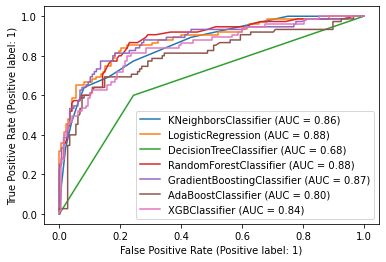

In [154]:
disp=plot_roc_curve(knc,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(Dr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(Ada,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()


In [155]:
#observations:
# Choosing KNeighbor Classifier as the Best model
# as the Training score is 83% and and the testscore is 86%
# saving the model with KNeighborClassifier.

In [156]:
import pickle                                 # MODEL SAVING.
filename='Titanic_project.pkl'
pickle.dump(knc,open(filename,'wb'))

In [157]:
                             #CONCLUSION

In [158]:
import numpy as np
a=np.array(y_test)
predicted=np.array(knc.predict(x_test))
df_conclusion=pd.DataFrame({"original":a,"predicted":predicted})
df_conclusion

,original,predicted
0,0,0
1,1,0
2,1,0
3,1,1
4,0,0
...,...,...
218,0,0
219,0,0
220,0,0
221,1,0
